# Project: Predicting sleep variables in mammals


# Objectives : 

Build a model to predict the sleeping attributes TotalSleep and Dreaming from the general, ecological and biological attributes. 

Assess what is the correlation between diet groups, endanger status or Genus to the sleeping attributes.

Study the correlations and regressions within biological and ecological attributes. 

Feature engineering and selection

Model training and evaluation and finally, deployment.

# Steps

Data analysis : Exploratory analysis, feature selection and data preparation 

Train and test the ML algorithms

Assess their scoring and choose the best  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

In [2]:
file_path = 'sleep_merged.tsv'
df = pd.read_csv(file_path, delimiter='\t')
df

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Vervet,Cercopithecus,Primates,omni,lc,4.750,58.0,10.0,14.0,9.7,0.6,24.0,210.0,4.0,3.0,4.0
83,Vesper mouse,Calomys,Rodentia,herbi,NaN,0.045,0.0,7.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Vole,Microtus,Rodentia,herbi,NaN,0.035,0.0,12.8,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Water opossum,Chironectes,Didelphimorphia,carni,lc,3.500,3.9,19.4,4.6,12.8,6.6,3.0,14.0,2.0,1.0,1.0


# The dataset 

## The dataset provides  16 attributes for 87 mammals. 

It provides: 

### General attributes of the species:

Species: name of the species

Order: lower taxonomic rank

Genus: higher taxonomic rank

Vore: Is it carnivore, omnivore, or herbivore?

Conservation: the conservation status of the mammal in the International Union for Conservation of Nature categories

### Biological attributes of the species:

BodyWt: body weight (kg)

BrainWt: brain weight (g)

LifeSpan: maximum life span (years)

Gestation: the number of days the offspring of an organism develops inside the mother's uterus before being born

### Ecological attributes of the species:

Predation: predation index (1-5) 1 = minimum (least likely to be preyed upon); 5 = maximum (most likely to be preyed upon)

Exposure: sleep exposure index (1-5) 1 = least exposed (e.g. animal sleeps in a well-protected den); 5 = most exposed

Danger: overall danger index (1-5) (based on the above two indices and other information) 1 = least danger (from other animals); 5 = most danger (from other animals)


### Sleep attributes of the species:

TotalSleep: total sleep, sum of slow wave and paradoxical sleep (hrs/day)

Awake: amount of time spent awake (hrs/day, Awake=24-TotalSleep)

NonDreaming: slow wave ("nondreaming") sleep (hrs/day)

Dreaming: paradoxical ("dreaming") sleep (hrs/day) detected by phase of REM (Rapid Eye Movement)

# Exploratory analysis

This functions will give us some insights on the dataset :   
### The missing Values percentage : 
Which is equal to : Total values/ nb missing values for each column.  
We can see that some variables may be problematic due to the high percentage of missing values. Like NonDreaming  with 45.9, Conservation    33.3, Dreaming 27.5,
LifeSpan        37.9,
Gestation       37.9,
Predation       33.3,
Exposure        33.3,
Danger          33.3.
### Unique Values for Categorical Variables :
Prints the number of unique values for each categorical variable.  
And we can see that some variables have almost unique values for each row like : Species with 87 unique values
and Genus with 80 unique values
### Descriptive Statistics for Numerical Features :  
Summary of descriptive statistics for numerical columns in the DataFrame, such as mean, standard deviation, minimum, and maximum values. 
### Value Counts for Each Categorical Column:  
Prints the counts of unique entries for each categorical column in the dataset. It identifies categorical columns as those with 'object' datatype and then lists how many times each unique value occurs in these columns.

In [3]:
def explore_dataset(dataframe):
    print(f"Dataset Shape: {dataframe.shape}\n")  # Rows and Columns
    print("Data Types:")
    print(dataframe.dtypes)  # Column Data Types
    print("\nMissing Values Percentage:")
    missing_percentage = (dataframe.isnull().sum() / len(dataframe)) * 100
    print(missing_percentage)  # Percentage of missing values by column
    
    print("\nUnique Values for Categorical Variables:")
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':  # For categorical data
            unique_count = dataframe[col].nunique()
            print(f"{col}: {unique_count} unique values")
    
    print("\nDescriptive Statistics for Numerical Features:")
    print(dataframe.describe())  # Summary stats for numerical columns
    
    # For more detail
    print("\nValue Counts for Each Categorical Column:")
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            print(f"\nValue counts for {col} column:")
            print(dataframe[col].value_counts())



explore_dataset(df)

Dataset Shape: (87, 16)

Data Types:
Species          object
Genus            object
Order            object
Vore             object
Conservation     object
BodyWt          float64
BrainWt         float64
TotalSleep      float64
Awake           float64
NonDreaming     float64
Dreaming        float64
LifeSpan        float64
Gestation       float64
Predation       float64
Exposure        float64
Danger          float64
dtype: object

Missing Values Percentage:
Species          0.000000
Genus            0.000000
Order            0.000000
Vore             0.000000
Conservation    33.333333
BodyWt           0.000000
BrainWt          0.000000
TotalSleep       0.000000
Awake            0.000000
NonDreaming     45.977011
Dreaming        27.586207
LifeSpan        37.931034
Gestation       37.931034
Predation       33.333333
Exposure        33.333333
Danger          33.333333
dtype: float64

Unique Values for Categorical Variables:
Species: 87 unique values
Genus: 80 unique values
Order: 19 uniq

## Distribution of numerical features
Beside the describe() function, plots are more efficient to show the distribution of numerical features. 

Here we can see that some of the numerical features are not continuous but discrete.
Like "Danger", "Exposure" and "Predation" who take discrete values from 1 to 5.  

Also some of these numerical features (BodyWT and BrainWt) have outliers that obscure their true distribution on the graph.  

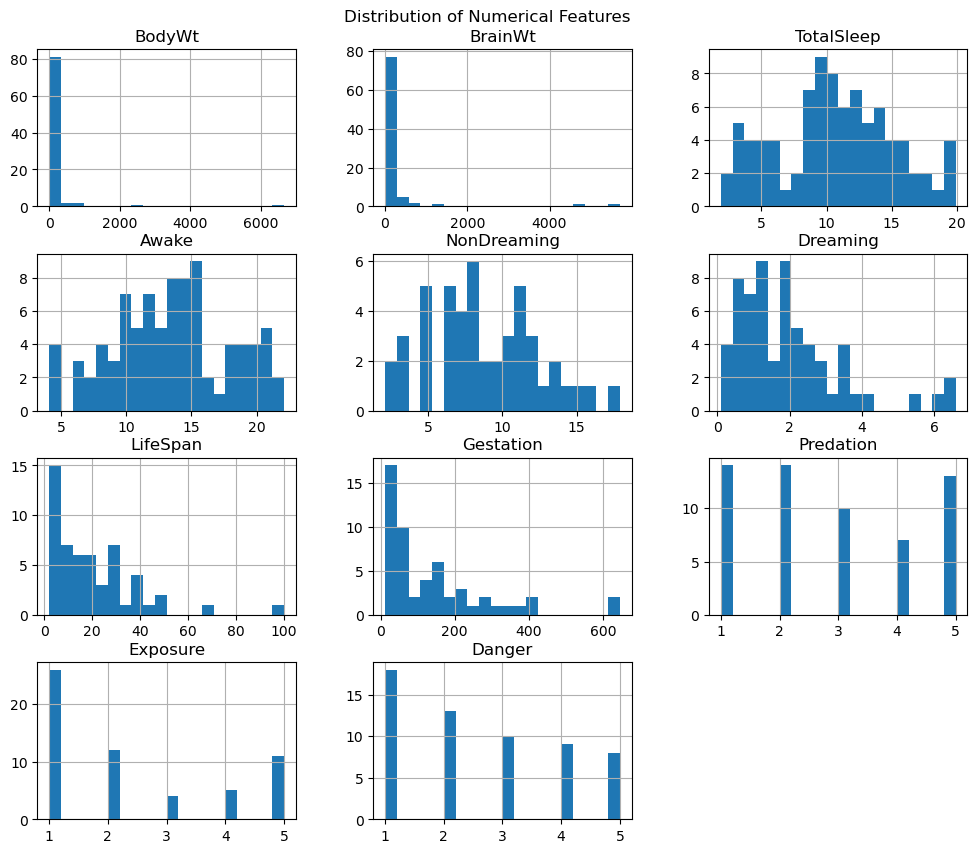

In [4]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numerical Features", x=0.5, y=0.92)
plt.show()

#### Zoom on Body weight and brain weight

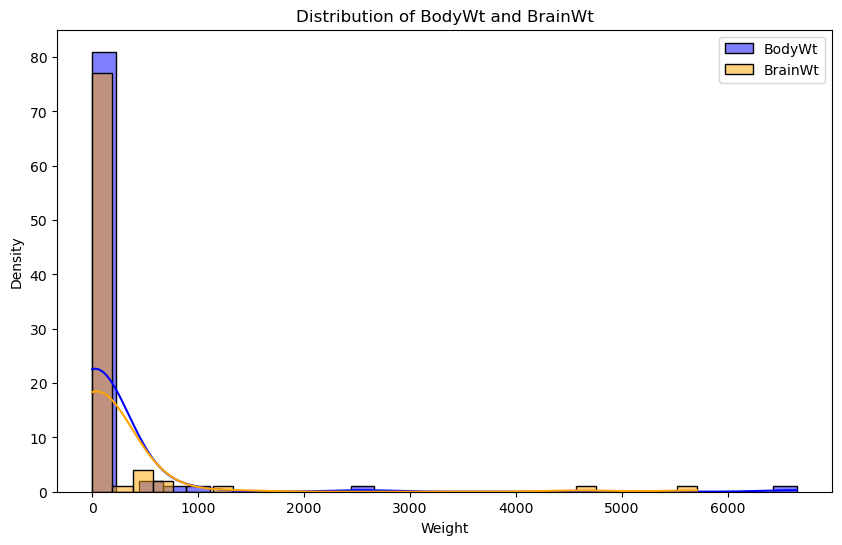

In [5]:
plt.figure(figsize=(10,6))

# Plot distribution side by side 
sns.histplot(data=df, x='BodyWt', color="blue", label='BodyWt', kde=True, bins=30)
sns.histplot(data=df, x='BrainWt', color="orange", label='BrainWt', kde=True, bins=30)

plt.title('Distribution of BodyWt and BrainWt')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()
plt.show()

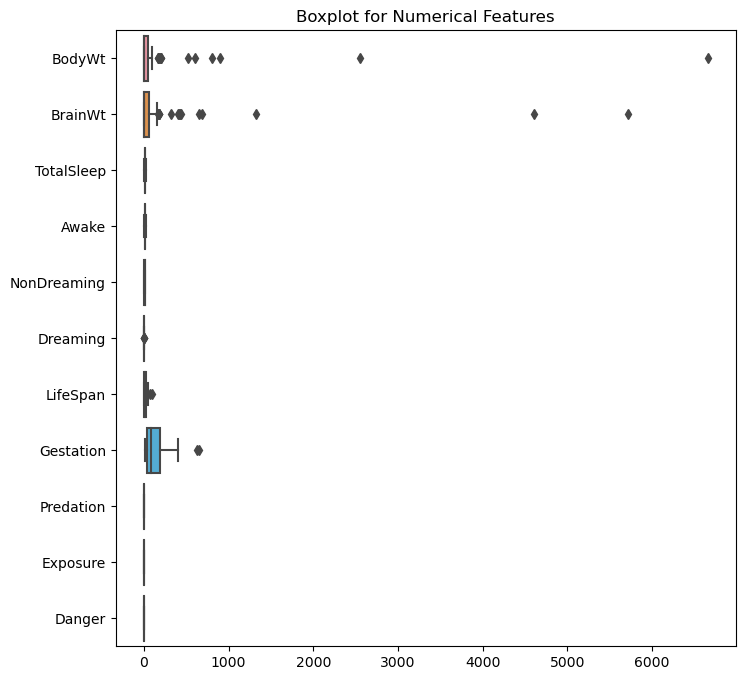

In [6]:
# Boxplot for outliers detection
plt.figure(figsize=(8, 8))
sns.boxplot(data=numerical_features, orient="h")
plt.title("Boxplot for Numerical Features")
plt.show()

# The correlations 

## Correlation matrix
We can see that some variables have strong correlations between each other.  

TotalSleep is mostly correlated with the other sleep attributes which is predictable since all these variables are related to each other, but the most correlated variables (other than sleep attributes) seems to be Gestation(-0.66), exposure (-0.68) and Danger (0.59). And it still a very moderate correlation.  

Same for Dreaming, the most relevant correlations using this matrix are Gestation, exposure and predation.

Aside from the sleep attributes we have the biological and ecological attributes that show a strong positive correlation between predation and danger, BodyWT and BrainWT, Gestation and BrainWt...etc 

We can see the least and most correlated pairs under the matrix, which is quite interesting.

C:\Users\u_10017032\AppData\Local\Temp\ipykernel_13188\2287681465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


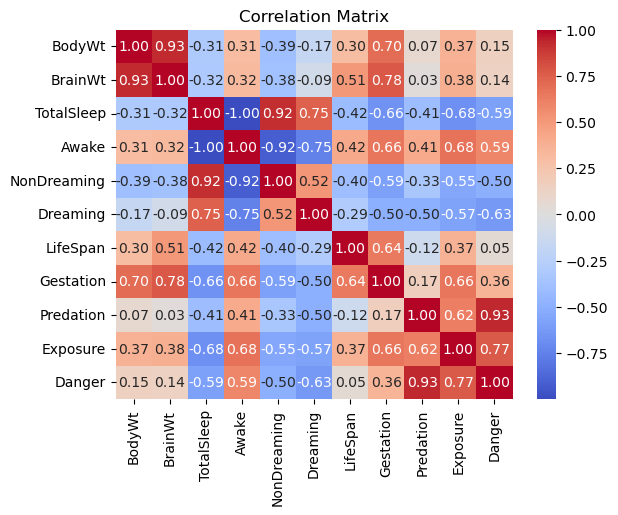

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### The most correlated pairs 

In [8]:
corr_matrix = df.corr()
corr_series = corr_matrix.unstack()

corr_series = corr_series.sort_values(ascending=False)
corr_series = corr_series[corr_series < 1]  # enlèver la corrélation parfaite de la variable avec elle-même
corr_series = corr_series.drop_duplicates()
corr_series = abs(corr_series)   #valeur absolue pour inclure les corrélations négatives et positives


top_15_correlated_pairs = corr_series.head(15)
print("top 15 correlated pairs :")
print(top_15_correlated_pairs)


top 15 correlated pairs :
Danger       Predation      0.930782
BodyWt       BrainWt        0.925683
TotalSleep   NonDreaming    0.915648
Gestation    BrainWt        0.776817
Danger       Exposure       0.770361
Dreaming     TotalSleep     0.749131
Gestation    BodyWt         0.696004
Exposure     Awake          0.677876
Awake        Gestation      0.660791
Gestation    Exposure       0.659636
             LifeSpan       0.643651
Exposure     Predation      0.619839
Danger       Awake          0.587729
NonDreaming  Dreaming       0.517966
BrainWt      LifeSpan       0.506326
dtype: float64


C:\Users\u_10017032\AppData\Local\Temp\ipykernel_13188\1709100300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


# Study the correlation between diet groups, danger status or Genus to the sleeping attributes

Since these three variables have different tytpes we will use different ways to assess the correlation between them and the sleep attributes (TotalSleep and Dreaming)

### Danger and sleep attributes using the Pearson correlation coefficient

In [9]:
# calculate the Pearson correlation coefficient
correlation1 = df['TotalSleep'].corr(df['Danger'])
correlation2 = df['Dreaming'].corr(df['Danger'])
print(f"Correlation between TotalSleep and Danger: {correlation1}")
print(f"Correlation between Dreaming and Danger: {correlation2}")

Correlation between TotalSleep and Danger: -0.5877289494853494
Correlation between Dreaming and Danger: -0.6280596087657844


A correlation of -0.5877289494853494 between TotalSleep and Danger, and -0.6280596087657844 between Dreaming and Danger  suggests a moderate negative linear relationship. This means that as the Danger rating increases, the TotalSleep tends to decrease, or vice versa. While it is a significant correlation, it is not so strong that one can predict the TotalSleep precisely based on the Danger.

### Vore and the sleep attributes using the pearson correlation coefficient

In [10]:
# Get one-hot encoded DataFrame
vore_encoded = pd.get_dummies(df['Vore'], prefix='Vore')
# Concatenate the one-hot encoded columns to the original DataFrame
df_encoded = pd.concat([df, vore_encoded], axis=1)

# Calculate the correlation of TotalSleep with these encoded variables
for category in vore_encoded.columns:
    total_sleep_correlation = df['TotalSleep'].corr(df_encoded[category])
    dreaming_correlation = df['Dreaming'].corr(df_encoded[category])
    
    print(f"Correlation between TotalSleep and {category}: {total_sleep_correlation}")
    print(f"Correlation between Dreaming and {category}: {dreaming_correlation}")

Correlation between TotalSleep and Vore_carni: 0.0519528167829509
Correlation between Dreaming and Vore_carni: 0.23235300000631062
Correlation between TotalSleep and Vore_herbi: -0.2021098094692902
Correlation between Dreaming and Vore_herbi: -0.3365038178756222
Correlation between TotalSleep and Vore_insecti: 0.2108526903890261
Correlation between Dreaming and Vore_insecti: 0.25364879508572874
Correlation between TotalSleep and Vore_omni: 0.03900189265439647
Correlation between Dreaming and Vore_omni: -0.003089006677157919


There are no strong linear relationships between The sleep attributes and the encoded Vore categories. All the correlation coefficients are quite low, indicating that if there's any relationship between an animal's diet (as categorized by carnivore, herbivore, insectivore, omnivore) and the amount of sleep it gets, it's likely to be weak and possibly influenced by other factors not included in this simple linear correlation.  

This correlation coefficient only measures linear relationships. There may be non-linear relationships that these coefficients cannot detect.  

These patterns can not be used to infer a direct cause-and-effect relationship without further investigation. Correlation does not imply causation.

### Genus and the sleep attributes 

Investigating the correlation between Genus and TotalSleep in a dataset with 80 unique genera out of 87 observations is problematic.  

The near one-to-one ratio of genera to data points undermines statistical power, making any discovered correlation likely spurious and not indicative of a real-world relationship. 

### Conclusion on the most relevant attributes to predict the sleep attributes

Top-3 correlated attributes with TotalSleep: Exposure, Gestation and Danger.

Top-3 correlated attributes with Dreaming: Danger, Exposure and Predation.

# Feature selection and data preparation

### Remove Awake, NonDreaming, species and Genus

Some sleep attributes are redundant and irrelevant so we're gonna have to let go some of them :   

Awake : because Awake = 24 - TotalSleep  

NonDreaming : because Non-dreaming = TotalSleep - Dreaming and it has 47% of missing values when Dreaming has less missing values and it is the one that's detected by phase of REM (Rapid Eye Movement)

Since Dreaming and TotalSleep has no mahematical relation between each other and we can calculate with their values Awake and NonDreaming we're gonna choose them as targets to build our predictive model

Also we're gonna remove the column Genus and species from the dataset because they have too many unique values

Given our dataset consists of 87 rows with 80 unique values in the Genus column, each genus is represented by very few samples - in some cases, only one. This can lead to overfitting, where a predictive model might learn to recognize the specific samples rather than generalizing from broader patterns. Additionally, such a high cardinality with sparse representation of each category weakens the statistical power of any inference made by the model and undermines the reliability and applicability of its predictions. Removing the Genus column could prevent these issues and might lead to a model that generalizes better on unseen data.

In [11]:
df_new = df.drop(['Awake', 'NonDreaming', 'Genus', 'Species'], axis=1)
df_new

,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,Proboscidea,herbi,vu,6654.000,5712.0,3.3,NaN,38.6,645.0,3.0,5.0,3.0
1,Rodentia,omni,NaN,1.000,6.6,8.3,2.0,4.5,42.0,3.0,1.0,3.0
2,Rodentia,omni,NaN,0.044,0.0,8.7,NaN,NaN,NaN,NaN,NaN,NaN
3,Carnivora,carni,NaN,3.380,44.5,12.5,NaN,14.0,60.0,1.0,1.0,1.0
4,Rodentia,herbi,lc,0.920,5.7,16.6,NaN,NaN,25.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,Primates,omni,lc,4.750,58.0,10.0,0.6,24.0,210.0,4.0,3.0,4.0
83,Rodentia,herbi,NaN,0.045,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
84,Rodentia,herbi,NaN,0.035,0.0,12.8,NaN,NaN,NaN,NaN,NaN,NaN
85,Didelphimorphia,carni,lc,3.500,3.9,19.4,6.6,3.0,14.0,2.0,1.0,1.0


## Filling null values 

In [12]:
# for float variables
for column in [ 'Dreaming', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']:
    df_new[column] = df_new[column].fillna(df_new[column].mean())

#for categorical variables
df_new['Conservation'] = df_new['Conservation'].fillna(df['Conservation'].mode()[0])
df_new

,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,Proboscidea,herbi,vu,6654.000,5712.0,3.3,1.979365,38.600000,645.000000,3.000000,5.000000,3.000000
1,Rodentia,omni,lc,1.000,6.6,8.3,2.000000,4.500000,42.000000,3.000000,1.000000,3.000000
2,Rodentia,omni,lc,0.044,0.0,8.7,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
3,Carnivora,carni,lc,3.380,44.5,12.5,1.979365,14.000000,60.000000,1.000000,1.000000,1.000000
4,Rodentia,herbi,lc,0.920,5.7,16.6,1.979365,20.240741,25.000000,5.000000,2.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
82,Primates,omni,lc,4.750,58.0,10.0,0.600000,24.000000,210.000000,4.000000,3.000000,4.000000
83,Rodentia,herbi,lc,0.045,0.0,7.0,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
84,Rodentia,herbi,lc,0.035,0.0,12.8,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
85,Didelphimorphia,carni,lc,3.500,3.9,19.4,6.600000,3.000000,14.000000,2.000000,1.000000,1.000000


## One-hot encoding

In [13]:
df_binary = pd.get_dummies(df_new, columns=['Order', 'Vore', 'Conservation'])
df_binary

,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,Order_Afrosoricida,...,Vore_herbi,Vore_insecti,Vore_omni,Conservation_cd,Conservation_cr,Conservation_domesticated,Conservation_en,Conservation_lc,Conservation_nt,Conservation_vu
0,6654.000,5712.0,3.3,1.979365,38.600000,645.000000,3.000000,5.000000,3.000000,0,...,1,0,0,0,0,0,0,0,0,1
1,1.000,6.6,8.3,2.000000,4.500000,42.000000,3.000000,1.000000,3.000000,0,...,0,0,1,0,0,0,0,1,0,0
2,0.044,0.0,8.7,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207,0,...,0,0,1,0,0,0,0,1,0,0
3,3.380,44.5,12.5,1.979365,14.000000,60.000000,1.000000,1.000000,1.000000,0,...,0,0,0,0,0,0,0,1,0,0
4,0.920,5.7,16.6,1.979365,20.240741,25.000000,5.000000,2.000000,3.000000,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,4.750,58.0,10.0,0.600000,24.000000,210.000000,4.000000,3.000000,4.000000,0,...,0,0,1,0,0,0,0,1,0,0
83,0.045,0.0,7.0,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207,0,...,1,0,0,0,0,0,0,1,0,0
84,0.035,0.0,12.8,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207,0,...,1,0,0,0,0,0,0,1,0,0
85,3.500,3.9,19.4,6.600000,3.000000,14.000000,2.000000,1.000000,1.000000,0,...,0,0,0,0,0,0,0,1,0,0


### Train test split

In [14]:
X = df_binary.drop(['TotalSleep', 'Dreaming'], axis=1)  
y = df_binary[['TotalSleep', 'Dreaming']]  # Targets

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Models building and testing

## XGBoost

In [15]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, learning_rate = 0.05, max_depth =3)
multioutput_xgb_model = MultiOutputRegressor(xgb_model)
multioutput_xgb_model.fit(X_train, y_train)


predictions = multioutput_xgb_model.predict(X_test)


for i, target in enumerate(y_test):
    
    target_predictions = predictions[:, i]
    target_real_values = y_test[target].values
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(target_real_values, target_predictions)
    print(f'Mean Absolute Error (MAE) for {target}: {mae}')

    # Mean Squared Error (MSE)
    mse = mean_squared_error(target_real_values, target_predictions)
    print(f'Mean Squared Error (MSE) for {target}: {mse}')

    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(target_real_values, target_predictions, squared=False)
    print(f'Root Mean Squared Error (RMSE) for {target}: {rmse}')

    # R-squared (Coefficient of Determination)
    r2 = r2_score(target_real_values, target_predictions)
    print(f'R-squared (Coefficient of Determination) for {target}: {r2}\n')

Mean Absolute Error (MAE) for TotalSleep: 3.7145196384853785
Mean Squared Error (MSE) for TotalSleep: 19.174265731034122
Root Mean Squared Error (RMSE) for TotalSleep: 4.378842967158576
R-squared (Coefficient of Determination) for TotalSleep: 0.19285654561865506

Mean Absolute Error (MAE) for Dreaming: 0.9010561552312638
Mean Squared Error (MSE) for Dreaming: 1.9926929701745644
Root Mean Squared Error (RMSE) for Dreaming: 1.4116277732371818
R-squared (Coefficient of Determination) for Dreaming: -0.10011511756302327



### Find the best parameters for xgboost

In [16]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    
}


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
)

# Fit the grid search model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean score from the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best score found:  7.508789835027947


## LinearRegression

In [17]:
linear_model = LinearRegression()
multioutput_linear_model = MultiOutputRegressor(linear_model)
multioutput_linear_model.fit(X_train, y_train)


predictions = multioutput_linear_model.predict(X_test)


for i, target in enumerate(['TotalSleep', 'Dreaming']):  
    
    target_predictions = predictions[:, i]
    target_real_values = y_test.iloc[:, i].values  
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(target_real_values, target_predictions)
    print(f'Mean Absolute Error (MAE) for {target}: {mae}')

    # Mean Squared Error (MSE)
    mse = mean_squared_error(target_real_values, target_predictions)
    print(f'Mean Squared Error (MSE) for {target}: {mse}')

    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(target_real_values, target_predictions, squared=False)
    print(f'Root Mean Squared Error (RMSE) for {target}: {rmse}')

    # R-squared (Coefficient of Determination)
    r2 = r2_score(target_real_values, target_predictions)
    print(f'R-squared (Coefficient of Determination) for {target}: {r2}\n')

Mean Absolute Error (MAE) for TotalSleep: 2.712173542635586
Mean Squared Error (MSE) for TotalSleep: 11.019995034639987
Root Mean Squared Error (RMSE) for TotalSleep: 3.319637786662874
R-squared (Coefficient of Determination) for TotalSleep: 0.536111735161351

Mean Absolute Error (MAE) for Dreaming: 0.7934500653086334
Mean Squared Error (MSE) for Dreaming: 1.2826926197045228
Root Mean Squared Error (RMSE) for Dreaming: 1.1325602057747406
R-squared (Coefficient of Determination) for Dreaming: 0.2918580216600819



## SVR

In [18]:
svm_model = SVR()
multioutput_svm_model = MultiOutputRegressor(svm_model)
multioutput_svm_model.fit(X_train, y_train)


predictions = multioutput_svm_model.predict(X_test)


for i, target in enumerate(['TotalSleep', 'Dreaming']): 
    
    target_predictions = predictions[:, i]
    target_real_values = y_test.iloc[:, i].values  
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(target_real_values, target_predictions)
    print(f'Mean Absolute Error (MAE) for {target}: {mae}')
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(target_real_values, target_predictions)
    print(f'Mean Squared Error (MSE) for {target}: {mse}')
    
    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(target_real_values, target_predictions, squared=False)
    print(f'Root Mean Squared Error (RMSE) for {target}: {rmse}')
    
    # R-squared (Coefficient of Determination)
    r2 = r2_score(target_real_values, target_predictions)
    print(f'R-squared (Coefficient of Determination) for {target}: {r2}\n')

Mean Absolute Error (MAE) for TotalSleep: 4.174528278714942
Mean Squared Error (MSE) for TotalSleep: 21.9683221315731
Root Mean Squared Error (RMSE) for TotalSleep: 4.687037671234689
R-squared (Coefficient of Determination) for TotalSleep: 0.07524034239595634

Mean Absolute Error (MAE) for Dreaming: 0.8209067675707432
Mean Squared Error (MSE) for Dreaming: 1.779120885671156
Root Mean Squared Error (RMSE) for Dreaming: 1.3338369036996824
R-squared (Coefficient of Determination) for Dreaming: 0.017792599465287662



## Decision tree regressor

In [19]:
tree_model = DecisionTreeRegressor(random_state=42)
multioutput_tree_model = MultiOutputRegressor(tree_model)
multioutput_tree_model.fit(X_train, y_train)


predictions = multioutput_tree_model.predict(X_test)


for i, target in enumerate(['TotalSleep', 'Dreaming']):  
    
    target_predictions = predictions[:, i]
    target_real_values = y_test.iloc[:, i].values  

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(target_real_values, target_predictions)
    print(f'Mean Absolute Error (MAE) for {target}: {mae}')
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(target_real_values, target_predictions)
    print(f'Mean Squared Error (MSE) for {target}: {mse}')
    
    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(target_real_values, target_predictions, squared=False)
    print(f'Root Mean Squared Error (RMSE) for {target}: {rmse}')
    
    # R-squared (Coefficient of Determination)
    r2 = r2_score(target_real_values, target_predictions)
    print(f'R-squared (Coefficient of Determination) for {target}: {r2}\n')

Mean Absolute Error (MAE) for TotalSleep: 3.533333333333333
Mean Squared Error (MSE) for TotalSleep: 20.725555555555555
Root Mean Squared Error (RMSE) for TotalSleep: 4.552532872539808
R-squared (Coefficient of Determination) for TotalSleep: 0.12755477890305777

Mean Absolute Error (MAE) for Dreaming: 0.9798941798941798
Mean Squared Error (MSE) for Dreaming: 2.2538252008622375
Root Mean Squared Error (RMSE) for Dreaming: 1.501274525482344
R-squared (Coefficient of Determination) for Dreaming: -0.24427958191464794



## KNeighborsRegressor

In [20]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)


predictions = knn_model.predict(X_test)


for i, target in enumerate(['TotalSleep', 'Dreaming']):  
  
    target_predictions = predictions[:, i]
    target_real_values = y_test.iloc[:, i].values  

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(target_real_values, target_predictions)
    print(f'Mean Absolute Error (MAE) for {target}: {mae}')
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(target_real_values, target_predictions)
    print(f'Mean Squared Error (MSE) for {target}: {mse}')
    
    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(target_real_values, target_predictions, squared=False)
    print(f'Root Mean Squared Error (RMSE) for {target}: {rmse}')
    
    # R-squared (Coefficient of Determination)
    r2 = r2_score(target_real_values, target_predictions)
    print(f'R-squared (Coefficient of Determination) for {target}: {r2}\n')

Mean Absolute Error (MAE) for TotalSleep: 4.148888888888889
Mean Squared Error (MSE) for TotalSleep: 22.77875555555555
Root Mean Squared Error (RMSE) for TotalSleep: 4.7727094564362025
R-squared (Coefficient of Determination) for TotalSleep: 0.04112503166879988

Mean Absolute Error (MAE) for Dreaming: 0.9697707231040565
Mean Squared Error (MSE) for Dreaming: 1.9649726715377507
Root Mean Squared Error (RMSE) for Dreaming: 1.4017748291140595
R-squared (Coefficient of Determination) for Dreaming: -0.08481144557232567



## RandomForestRegressor

In [21]:
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)


predictions = forest_model.predict(X_test)


for i, target in enumerate(['TotalSleep', 'Dreaming']):  
    target_predictions = predictions[:, i]
    target_real_values = y_test.iloc[:, i].values

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(target_real_values, target_predictions)
    print(f'Mean Absolute Error (MAE) for {target}: {mae}')

    # Mean Squared Error (MSE)
    mse = mean_squared_error(target_real_values, target_predictions)
    print(f'Mean Squared Error (MSE) for {target}: {mse}')

    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(target_real_values, target_predictions, squared=False)
    print(f'Root Mean Squared Error (RMSE) for {target}: {rmse}')

    # R-squared (Coefficient of Determination)
    r2 = r2_score(target_real_values, target_predictions)
    print(f'R-squared (Coefficient of Determination) for {target}: {r2}\n')

Mean Absolute Error (MAE) for TotalSleep: 3.4636111111111108
Mean Squared Error (MSE) for TotalSleep: 17.648643611111112
Root Mean Squared Error (RMSE) for TotalSleep: 4.201028875300801
R-squared (Coefficient of Determination) for TotalSleep: 0.2570778266433671

Mean Absolute Error (MAE) for Dreaming: 0.8038932980599643
Mean Squared Error (MSE) for Dreaming: 1.512405240992694
Root Mean Squared Error (RMSE) for Dreaming: 1.229798862006586
R-squared (Coefficient of Determination) for Dreaming: 0.16503952470316807



## Comparaison

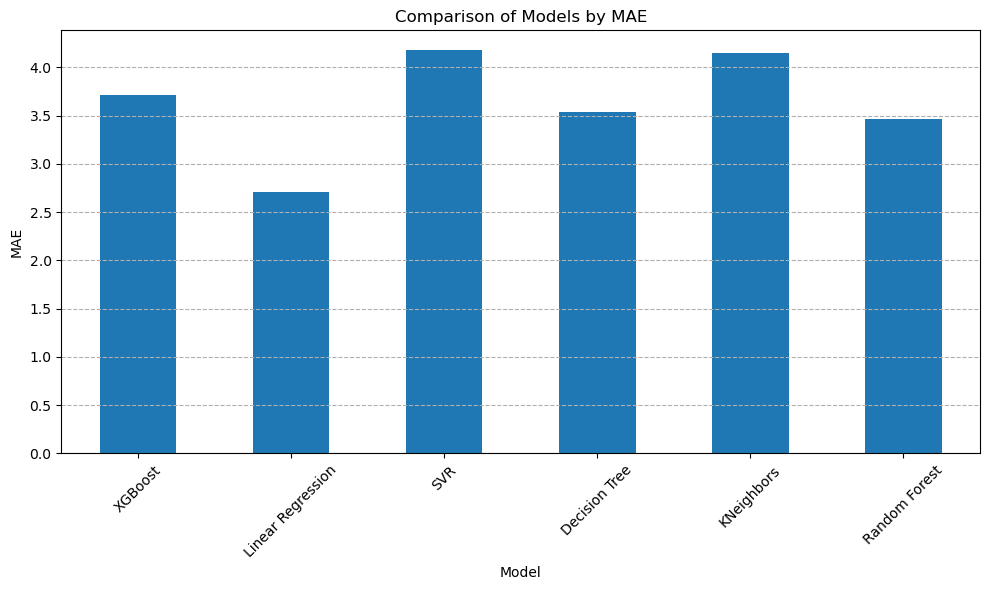

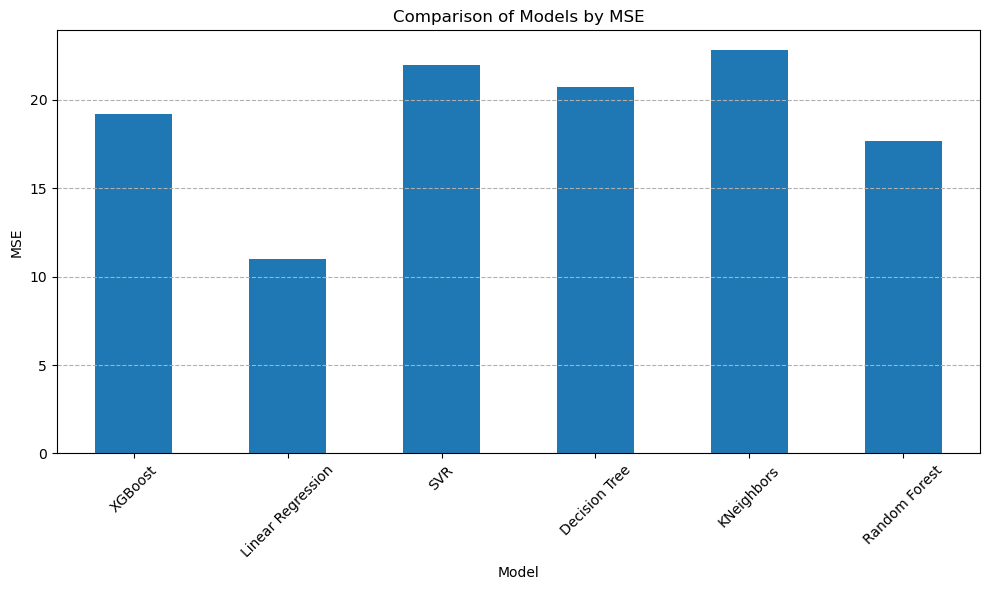

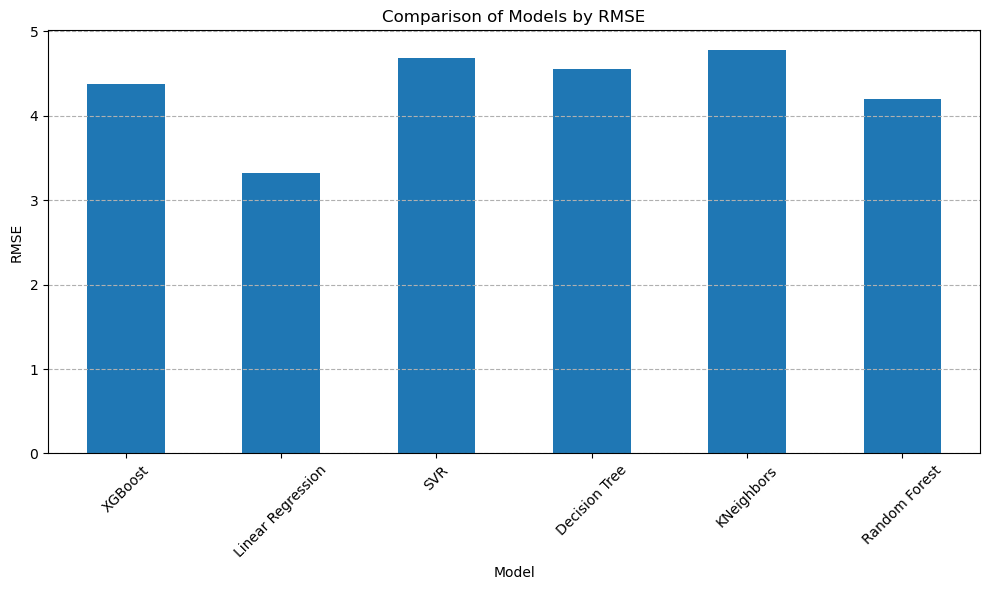

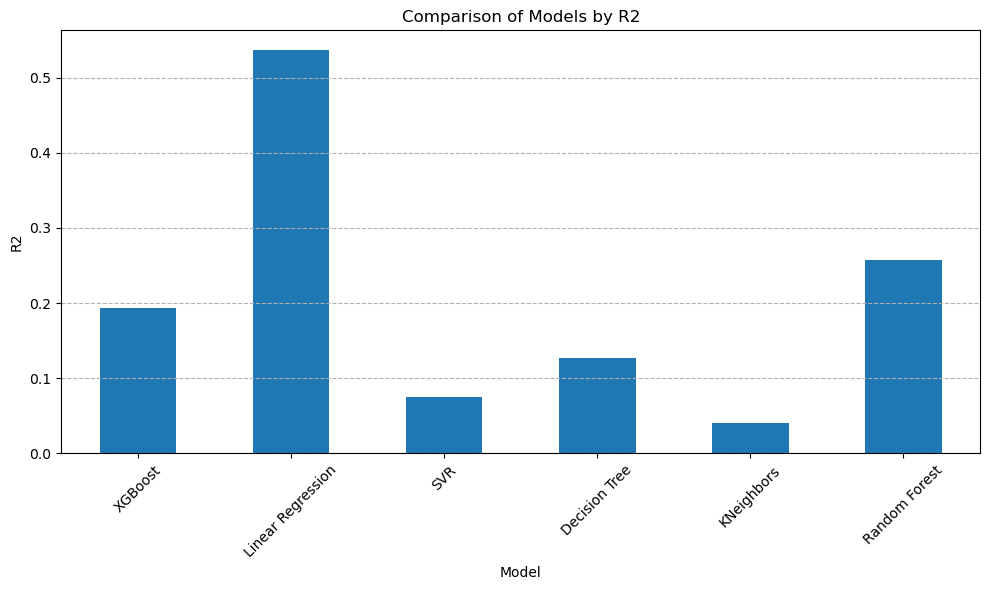

               Model     MAE      MSE    RMSE      R2
0            XGBoost  3.7145  19.1743  4.3788  0.1929
1  Linear Regression  2.7122  11.0200  3.3196  0.5361
2                SVR  4.1745  21.9683  4.6870  0.0752
3      Decision Tree  3.5333  20.7256  4.5525  0.1276
4         KNeighbors  4.1489  22.7788  4.7727  0.0411
5      Random Forest  3.4636  17.6486  4.2010  0.2571


In [22]:
metrics_data = {
    'Model': ['XGBoost', 'Linear Regression', 'SVR', 'Decision Tree', 'KNeighbors', 'Random Forest'],
    'MAE': [3.7145, 2.7122, 4.1745, 3.5333, 4.1489, 3.4636],
    'MSE': [19.1743, 11.0200, 21.9683, 20.7256, 22.7788, 17.6486],
    'RMSE': [4.3788, 3.3196, 4.6870, 4.5525, 4.7727, 4.2010],
    'R2': [0.1929, 0.5361, 0.0752, 0.1276, 0.0411, 0.2571]
}


metrics_df = pd.DataFrame(metrics_data)


def plot_metrics(df, metric):
    fig, ax = plt.subplots(figsize=(10, 6))
    df.set_index('Model')[metric].plot(kind='bar', ax=ax)
    ax.set_title(f'Comparison of Models by {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

# Tracer des graphiques pour chaque métrique
for metric in ['MAE', 'MSE', 'RMSE', 'R2']:
    plot_metrics(metrics_df, metric)


print(metrics_df)

We can see that  Linear Regression is the one that has the best performance